In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

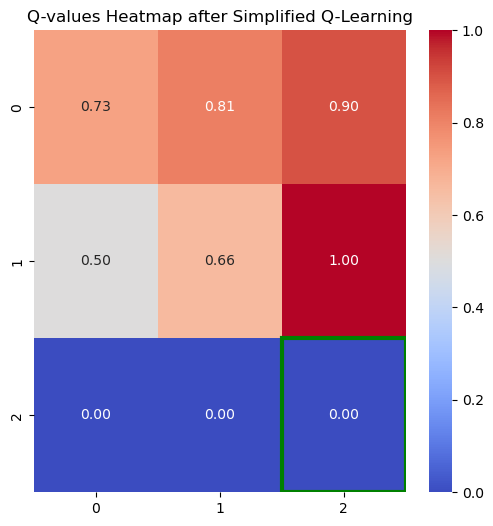

Learned Policy (arrows indicate the best action):
r r d
u u d
u u u


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Define the simplified environment (3x3 grid)
grid_size = 3
goal_state = (2, 2)
start_state = (0, 0)

# Rewards: +1 for goal, 0 for everything else
rewards = np.zeros((grid_size, grid_size))
rewards[goal_state] = 1

# Actions: up, down, left, right
actions = ['up', 'down', 'left', 'right']
action_mapping = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Initialize Q-values table
Q_values = np.zeros((grid_size, grid_size, len(actions)))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 500  # Number of episodes 

# Helper function: get next state based on action
def get_next_state(state, action):
    delta = action_mapping[action]
    next_state = (state[0] + delta[0], state[1] + delta[1])
    
    # Check boundaries (stay within grid)
    next_state = (max(0, min(grid_size - 1, next_state[0])),
                  max(0, min(grid_size - 1, next_state[1])))
    
    return next_state

# Helper function: choose action using epsilon-greedy strategy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        # Exploration: choose random action
        return random.choice(actions)
    else:
        # Exploitation: choose action with max Q-value
        state_Q_values = Q_values[state[0], state[1], :]
        return actions[np.argmax(state_Q_values)]

# Q-learning algorithm (simplified)
for episode in range(episodes):
    state = start_state
    
    while state != goal_state:
        action = choose_action(state)
        next_state = get_next_state(state, action)
        reward = rewards[next_state]
        
        # Q-learning update
        current_q_value = Q_values[state[0], state[1], actions.index(action)]
        max_future_q_value = np.max(Q_values[next_state[0], next_state[1], :])
        
        new_q_value = current_q_value + alpha * (reward + gamma * max_future_q_value - current_q_value)
        Q_values[state[0], state[1], actions.index(action)] = new_q_value
        
        # Move to next state
        state = next_state

# Visualization of learned Q-values
fig, ax = plt.subplots(figsize=(6, 6))

# Sum Q-values for each state to visualize overall state values
state_values = np.max(Q_values, axis=2)

# Plot heatmap of state values
sns.heatmap(state_values, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=ax)

# Highlight the goal state
ax.add_patch(plt.Rectangle(goal_state, 1, 1, fill=False, edgecolor='green', lw=3))

plt.title('Q-values Heatmap after Simplified Q-Learning')
plt.show()

# Visualizing the learned policy
policy = np.full((grid_size, grid_size), '', dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        best_action_idx = np.argmax(Q_values[i, j, :])
        policy[i, j] = actions[best_action_idx][0]  # Use first letter of action

print("Learned Policy (arrows indicate the best action):")
for row in policy:
    print(" ".join(row))
